In [34]:
# Imports
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get rid of pandas max width
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Define top runs per solution
top_runs = {
    "prescribed_chain": "20240531185311",
    "single_agent": "20240531180501",
    "react_agent": "20240603162320",
    "multi_agent_supervisor": "20240601092758"
}


# Constants
DATA_DIR = "../data"

# Compile results
agg_results = {}
df = pd.DataFrame()
for key, value in top_runs.items():
    # Load results
    with open(f"{DATA_DIR}/results/runs/final/{key}_{value}.json", "r") as file:
        results = json.load(file)


    # Append dict to df
    if len(df) == 0:
        df = pd.DataFrame(results)
        df.index = [key]
    else:
        new_row = pd.DataFrame(results, index=[key])
        df = pd.concat([df, new_row])

# Get mean, min distance
df["mean"] = df.mean(axis=1)
df["min"] = df.min(axis=1)
df = df[sorted(df.columns)]
display(df)


/var/folders/ql/wv3pfscn16n97r2hyk2lf4bm0000gn/T/ipykernel_92784/4086258751.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row])
/var/folders/ql/wv3pfscn16n97r2hyk2lf4bm0000gn/T/ipykernel_92784/4086258751.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row])
/var/folders/ql/wv3pfscn16n97r2hyk2lf4bm0000gn/T/ipykernel_92784/4086258751.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. 

,101,102,103,104,105,106,107,108,109,110,201,202,203,204,205,206,207,208,209,210,mean,min
prescribed_chain,458.28,21.79,395.62,0.16,3.78,6.49,156.04,16.80,478.35,19.91,1330.19,NaN,16713.51,119.21,3728.55,10597.25,14.18,143.02,3845.52,1153.19,2063.254737,0.16
single_agent,479.96,8.08,404.76,260.75,5.11,7.57,61.62,16.80,2138.00,655.48,2.90,84.34,752.53,156.01,NaN,3354.45,127.82,131.64,3914.08,12.27,661.798421,2.90
react_agent,271.34,21.79,NaN,261.19,3.77,7.57,155.96,4.10,NaN,41.85,NaN,86.00,58.76,NaN,NaN,NaN,2.92,99.11,300.41,NaN,101.136154,2.92
multi_agent_supervisor,252.04,8.52,395.39,262.13,4.40,7.57,156.04,11.24,363.37,19.91,NaN,NaN,70.51,96.08,132.18,1673.45,NaN,131.64,214.80,5.24,223.794706,4.40


## Metrics

### Average Distance (excluding NANs)

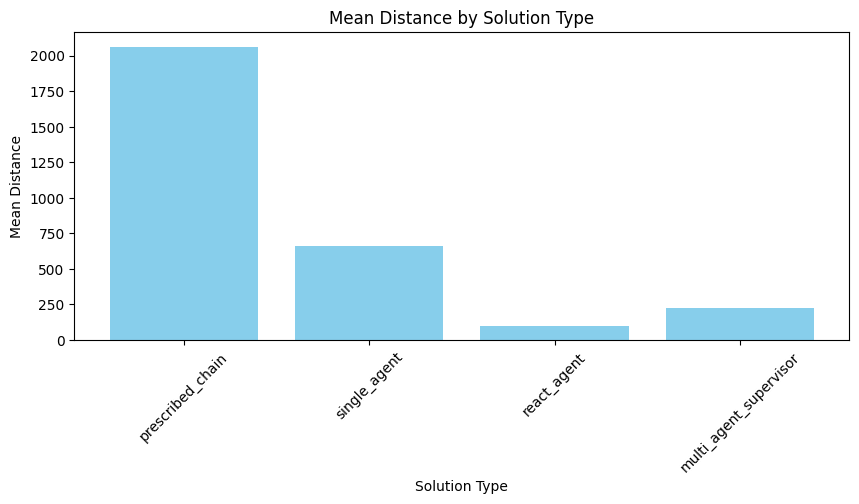

In [48]:
# Plot a bar chart of the mean column
plt.figure(figsize=(10, 4))
plt.bar(df.index, df['mean'], color='skyblue')
plt.xlabel('Solution Type')
plt.ylabel('Mean Distance')
plt.title('Mean Distance by Solution Type')
plt.xticks(rotation=45)
plt.show()

### Error Plots by Agent Type

#### 100 Level

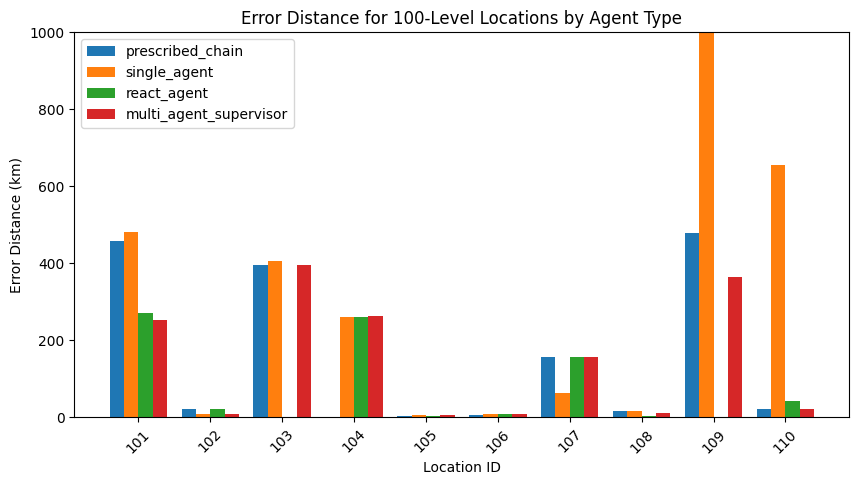

In [41]:
# Plotting values for each index for specified columns with multi-bar chart
plt.figure(figsize=(10, 5))
columns_to_plot = ['101', '102', '103', '104', '105', '106', '107', '108', '109', '110']
index_labels = df.index
bar_width = 0.2
x = np.arange(len(columns_to_plot))

for i, index_label in enumerate(index_labels):
    values = df.loc[index_label, columns_to_plot].fillna(-99)  # Replace NA values with -99
    plt.bar(x + i * bar_width, values, bar_width, label=index_label)

plt.xlabel('Location ID')
plt.ylabel('Error Distance (km)')
plt.title('Error Distance for 100-Level Locations by Agent Type')
plt.xticks(x + bar_width * (len(index_labels) - 1) / 2, columns_to_plot)
plt.xticks(rotation=45)
plt.ylim(0, 1000)
plt.legend()
plt.show()


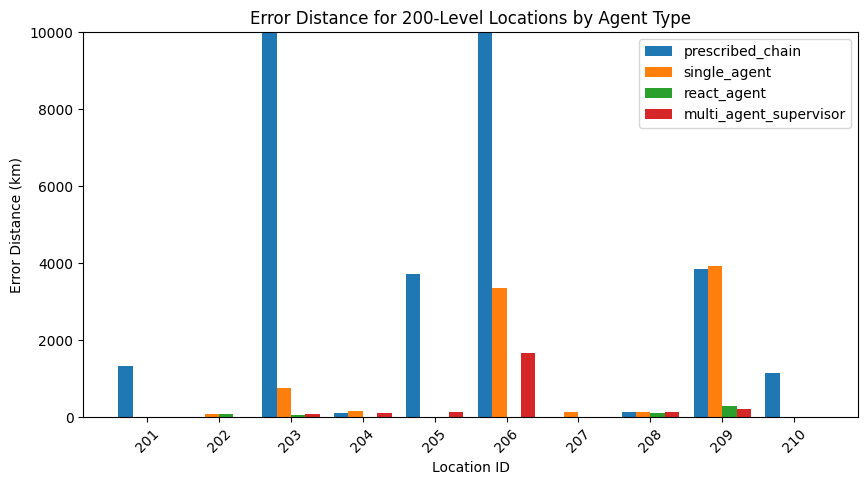

In [46]:
# Plotting values for each index for specified columns with multi-bar chart
plt.figure(figsize=(10, 5))
columns_to_plot = ['201','202', '203', '204', '205', '206', '207', '208', '209', '210']
index_labels = df.index
bar_width = 0.2
x = np.arange(len(columns_to_plot))

for i, index_label in enumerate(index_labels):
    values = df.loc[index_label, columns_to_plot].fillna(-999)  # Replace NA values with -99
    plt.bar(x + i * bar_width, values, bar_width, label=index_label)

plt.xlabel('Location ID')
plt.ylabel('Error Distance (km)')
plt.title('Error Distance for 200-Level Locations by Agent Type')
plt.xticks(x + bar_width * (len(index_labels) - 1) / 2, columns_to_plot)
plt.xticks(rotation=45)
plt.ylim(0, 10000)
plt.legend()
plt.show()

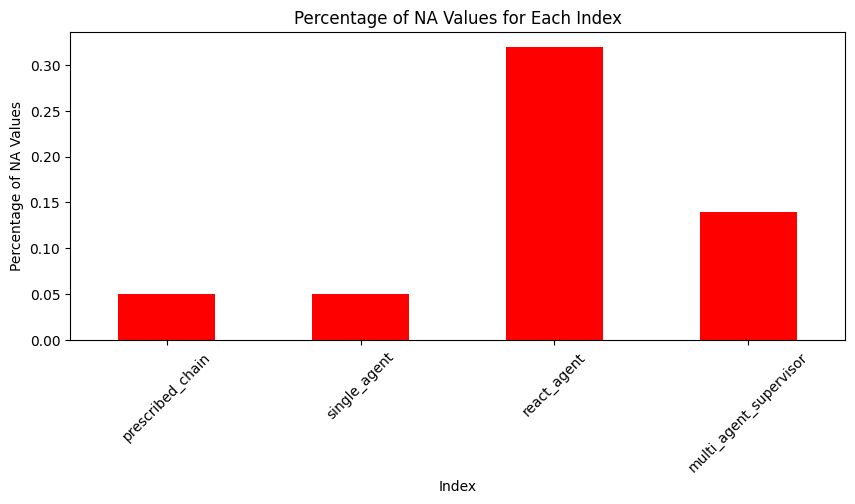

In [49]:
# Calculate the percentage of NA values for each index in the DataFrame and plot as a bar chart
na_percentage = round(df.isna().mean(axis=1), 2)
plt.figure(figsize=(10, 4))
na_percentage.plot(kind='bar', color='red')
plt.xlabel('Index')
plt.ylabel('Percentage of NA Values')
plt.title('Percentage of NA Values for Each Index')
plt.xticks(rotation=45)
plt.show()
